### Sobre

Dataset: https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?select=segmentation+data.csv

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using the above data companies can then outperform the competition by developing uniquely appealing products and services.
You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.shape

(2000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [5]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [6]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [7]:
#apagando a coluna ID

dados = df.drop('ID', axis = 1)
dados.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


### Analytics

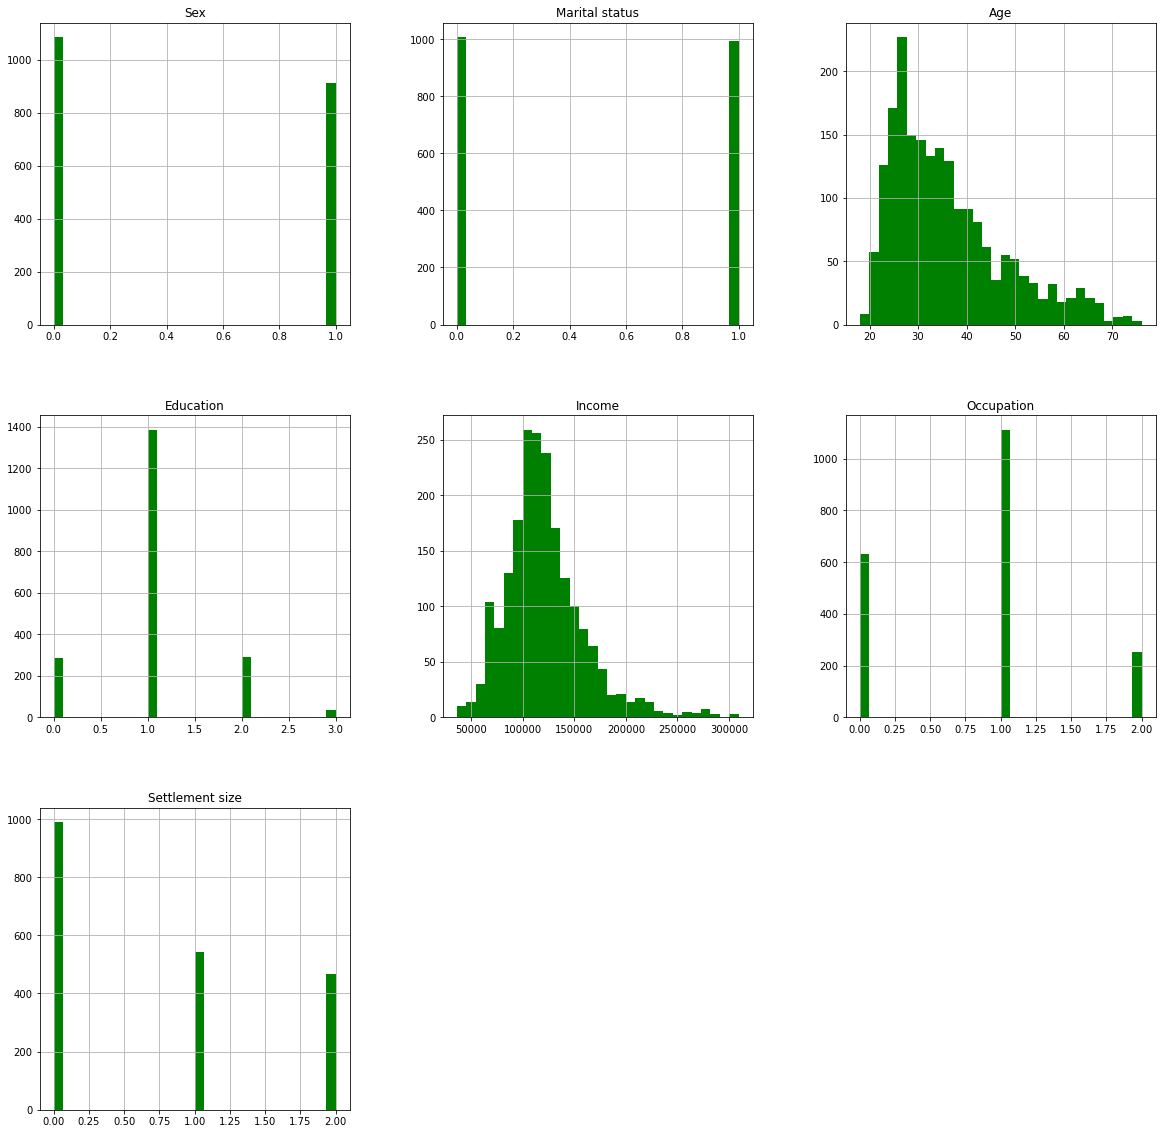

In [8]:
dados.hist(bins = 30, figsize = (20,20), color = 'g');

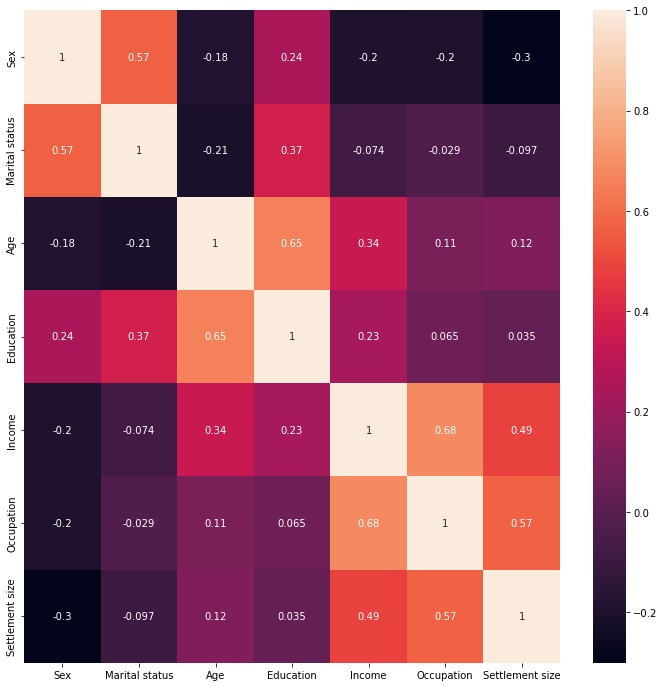

In [9]:
correlacao = dados.corr()
f, ax = plt.subplots(figsize = (12,12))
sns.heatmap(correlacao, annot=True);

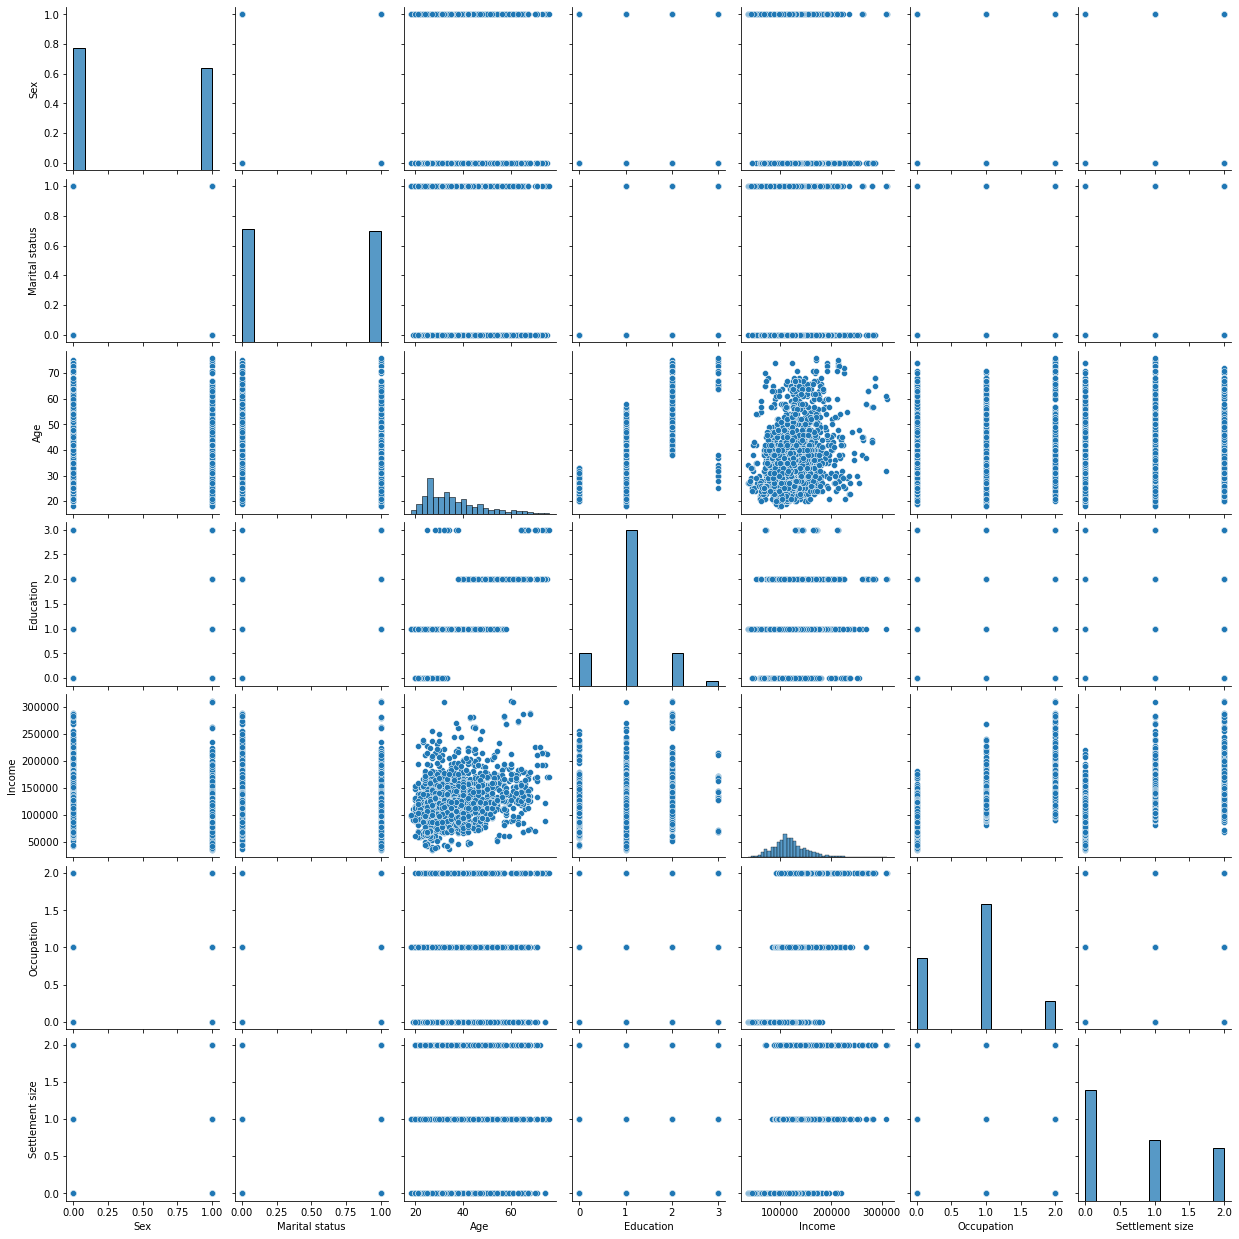

In [10]:
sns.pairplot(dados);

### Normalização e Método do cotovelo

In [11]:
from sklearn.cluster import KMeans

In [12]:
#Normalizando a base de dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(dados)

In [13]:
X

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [14]:
#metodo do cotovelo para saber o número de cluster
#fazer o agrupamento até 10 cluster
wcss = []
for i in range(1, 11):
    kmeans_cluster = KMeans(n_clusters=i, random_state=0)
    kmeans_cluster.fit(X)
    wcss.append(kmeans_cluster.inertia_)

In [15]:
wcss

[14000.000000000002,
 10514.347126465867,
 8631.672547949462,
 7169.870822465847,
 6403.082701138248,
 5881.453397979995,
 5369.717653497121,
 4984.469019850123,
 4688.677803396362,
 4349.5469809682745]

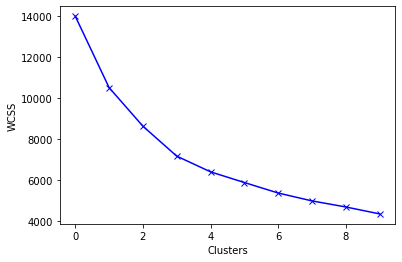

In [16]:
#pelo gráfico do cotovelo, iremos testar nossa solução com 3 ou 4 clusters
plt.plot(wcss, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

In [17]:
#utilizando o dendrograma para definir o número de clusters
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster


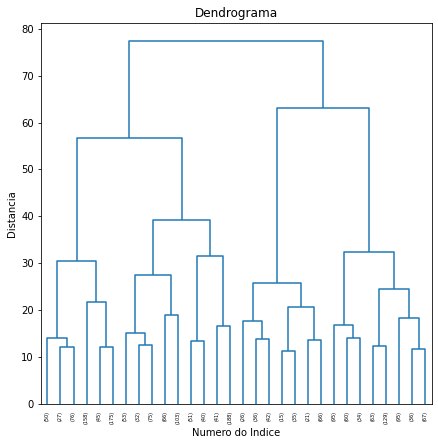

In [18]:
#pelo dendrograma temos 2 cluster
Z = linkage(X, 'ward');

plt.figure(figsize = [7,7])
plt.title('Dendrograma')
plt.xlabel('Numero do Indice')
plt.ylabel('Distancia')
dendrogram(
    Z,
    leaf_rotation = 90.,  
    leaf_font_size = 5.,  
    color_threshold = 0,
    truncate_mode = 'lastp'
)
plt.show()

### K-means
testarei com 2, 3, 4 ou 5 clusters e irei avaliar as métricas

- silhouette_score [-1,1]
- davies_bouldin_score [menor, melhor]
- calinski_harabasz_score [maior, melhor]


In [19]:
from sklearn import metrics
from sklearn.cluster import KMeans



In [20]:
# Criar uma função

def clustering_algorithm(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    s = metrics.silhouette_score(X, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(X, labels)
    calinski = metrics.calinski_harabasz_score(X, labels)
    return s, dbs, calinski


In [21]:
# 2 clusters
s2, dbs2, calinski2 = clustering_algorithm(2)
print(s2, dbs2, calinski2)

0.2496082794803034 1.640691527301922 662.3272675473671


In [22]:
# 3 clusters
s3, dbs3, calinski3 = clustering_algorithm(3)
print(s3, dbs3, calinski3)

0.27177060998494357 1.3991787805315543 621.1432114079042


In [23]:
# 4 clusters
s4, dbs4, calinski4 = clustering_algorithm(4)
print(s4, dbs4, calinski4)

0.26879180394522123 1.3314791878425056 633.8067623962023


In [24]:
# 5 clusters
s5, dbs5, calinski5 = clustering_algorithm(5)
print(s5, dbs5, calinski5)

0.2540800397305643 1.3092649697251217 591.7316011779471


In [25]:
#pelo resultado, escolherei 3 cluster, pois apresentou um melhor silhouette_score
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)
print(s4, dbs4, calinski4)
print(s5, dbs5, calinski5)


0.2496082794803034 1.640691527301922 662.3272675473671
0.27177060998494357 1.3991787805315543 621.1432114079042
0.26879180394522123 1.3314791878425056 633.8067623962023
0.2540800397305643 1.3092649697251217 591.7316011779471


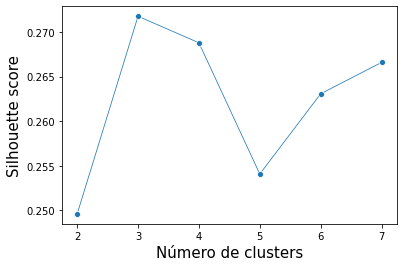

In [26]:
#visualizando o número de cluster por Silhouette Score
from sklearn.metrics import silhouette_score, silhouette_samples

sil = []
k_values = range(2,8);

for k in k_values:
    kmeans = KMeans(n_clusters = k,  
                    random_state = 42
                   ) 
    kmeans.fit(X)
    score = silhouette_score(X, 
                             kmeans.labels_
                            )
    sil.append(score)

sns.lineplot(x = k_values,
             y = sil, 
             marker = 'o', 
             size = 30,
             legend = False
            );
plt.ylabel('Silhouette score', fontsize = 15);
plt.xlabel('Número de clusters',fontsize = 15);

In [27]:
# 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [28]:
y_pred = kmeans.fit_predict(X)

In [29]:
labels = kmeans.labels_
labels

array([0, 2, 1, ..., 1, 2, 1])

In [30]:
#quantidade por labels
np.unique(labels, return_counts = True)

(array([0, 1, 2]), array([275, 859, 866], dtype=int64))

In [31]:
#centroide de cada atributo
kmeans.cluster_centers_

array([[ 0.05347083,  0.33064446,  1.68621189,  1.78018903,  0.97067312,
         0.47908902,  0.43320986],
       [-0.90805105, -0.73457795, -0.04231041, -0.55843916,  0.13342899,
         0.21112061,  0.35139322],
       [ 0.88373138,  0.62364345, -0.49349148, -0.0113773 , -0.44058962,
        -0.36154975, -0.4861195 ]])

In [32]:
#dados normalizados
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [dados.columns])
cluster_centers

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.053471,0.330644,1.686212,1.780189,0.970673,0.479089,0.433210
1,-0.908051,-0.734578,-0.042310,-0.558439,0.133429,0.211121,0.351393
2,0.883731,0.623643,-0.493491,-0.011377,-0.440590,-0.361550,-0.486119


In [33]:
#tirar a normalização dos dados
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [dados.columns])
cluster_centers

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.483636,0.661818,55.665455,2.105455,157936.381818,1.116364,1.090909
1,0.004657,0.129220,35.413271,0.703143,126037.969732,0.945285,1.024447
2,0.897229,0.808314,30.127021,1.031178,104168.264434,0.579677,0.344111


In [34]:
cluster_df = pd.concat([dados, pd.DataFrame({'cluster': labels})], axis = 1)
cluster_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,2
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


In [35]:
dados_ordenados = cluster_df.sort_values(by='cluster')
dados_ordenados.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,0
1013,0,1,57,2,144197,1,2,0
1012,1,1,46,2,192698,2,1,0
487,1,1,62,2,152620,1,2,0
1011,0,1,37,3,170113,2,2,0


### PCA

In [36]:
#aplicação do PCA para visualizar os dados
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
princ_comp = pca.fit_transform(X)
princ_comp

array([[ 2.51474593,  0.83412239],
       [ 0.34493528,  0.59814564],
       [-0.65106267, -0.68009318],
       ...,
       [-1.45229829, -2.23593665],
       [-2.24145254,  0.62710847],
       [-1.86688505, -2.45467234]])

In [37]:
pca_df = pd.DataFrame(data = princ_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,2.514746,0.834122
1,0.344935,0.598146
2,-0.651063,-0.680093
3,1.714316,-0.579927
4,1.626745,-0.440496


In [38]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,2.514746,0.834122,0
1,0.344935,0.598146,2
2,-0.651063,-0.680093,1
3,1.714316,-0.579927,1
4,1.626745,-0.440496,1


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

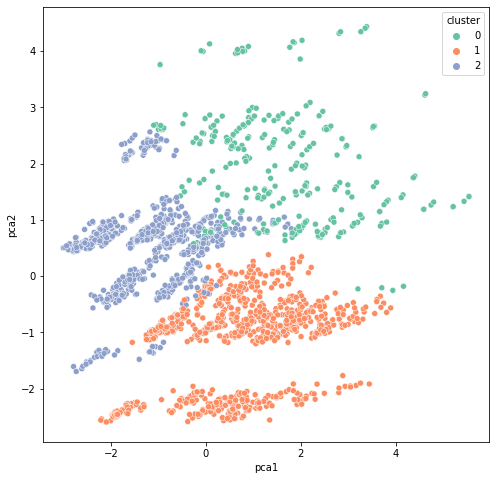

In [39]:
#visualizando os dados do pca

plt.figure(figsize=(8,8))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df
                , palette = 'Set2')

### Dados finais
Concatenando os dados dos clusters com o ID do cliente

In [40]:
dados = pd.concat([df.ID, cluster_df], axis = 1)
dados.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,100000001,0,0,67,2,124670,1,2,0
1,100000002,1,1,22,1,150773,1,2,2
2,100000003,0,0,49,1,89210,0,0,1
3,100000004,0,0,45,1,171565,1,1,1
4,100000005,0,0,53,1,149031,1,1,1
